In [1]:
import numpy as np
import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.4)
sns.set_palette("Set1")

In [2]:
# Flexibility
# Normalized flexibility parameters (B-values), average
# Vihinen M., Torkkila E., Riikonen P. Proteins. 19(2):141-9(1994).
flexibilities_vih = {"A": 0.984, "C": 0.906, "E": 1.094, "D": 1.068,
"G": 1.031, "F": 0.915, "I": 0.927, "H": 0.950,
"K": 1.102, "M": 0.952, "L": 0.935, "N": 1.048,
"Q": 1.037, "P": 1.049, "S": 1.046, "R": 1.008,
"T": 0.997, "W": 0.904, "V": 0.931, "Y": 0.929}

In [3]:
def flexibility(seq, flexibilities=flexibilities_vih):
    """Calculate the flexibility according to Vihinen, 1994.
    No argument to change window size because parameters are specific for
    a window=9. The parameters used are optimized for determining the
    flexibility.
    """

    
    window_size = 9
    weights = [0.25, 0.4375, 0.625, 0.8125, 1]
    scores = []

    for i in range(len(seq) - window_size):
        subsequence = seq[i:i + window_size]
        score = 0.0

        for j in range(window_size // 2):
            front = subsequence[j]
            back = subsequence[window_size - j - 1]
            score += (flexibilities[front] +
                      flexibilities[back]) * weights[j]

        middle = subsequence[window_size // 2 + 1]
        score += flexibilities[middle]

        scores.append(score / 5.25)

    return scores

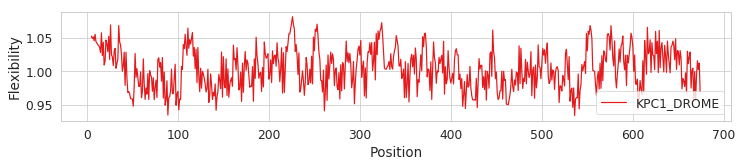

In [26]:
kpc1_drome = 'MSEGSDNNGDPQQQGAEGEAVGENKMKSRLRKGALKKKNVFNVKDHCFIARFFKQPTFCSHCKDFICGYQSGYAWMGFGKQGFQCQVCSYVVHKRCHEYVTFICPGKDKGIDSDSPKTQHNFEPFTYAGPTFCDHCGSLLYGIYHQGLKCSACDMNVHARCKENVPSLCGCDHTERRGRIYLEINVKENLLTVQIKEGRNLIPMDPNGLSDPYVKVKLIPDDKDQSKKKTRTIKACLNPVWNETLTYDLKPEDKDRRILIEVWDWDRTSRNDFMGALSFGISEIIKNPTNGWFKLLTQDEGEYYNVPCADDEQDLLKLKQKPSQKKPMVMRSDTNTHTSSKKDMIRATDFNFIKVLGKGSFGKVLLAERKGSEELYAIKILKKDVIIQDDDVECTMIEKRVLALGEKPPFLVQLHSCFQTMDRLFFVMEYVNGGDLMFQIQQFGKFKEPVAVFYAAEIAAGLFFLHTKGILYRDLKLDNVLLDADGHVKIADFGMCKENIVGDKTTKTFCGTPDYIAPEIILYQPYGKSVDWWAYGVLLYEMLVGQPPFDGEDEEELFAAITDHNVSYPKSLSKEAKEACKGFLTKQPNKRLGCGSSGEEDVRLHPFFRRIDWEKIENREVQPPFKPKIKHRKDVSNFDKQFTSEKTDLTPTDKVFMMNLDQSEFVGFSYMNPEYVFSP'
points = flexibility(kpc1_drome)


plt.figure(figsize=(12,2))
ax = sns.lineplot(list(range(5, len(kpc1_drome)-4)), points, label='KPC1_DROME')
ax.set_ylabel('Flexibility')
ax.set_xlabel('Position')
plt.savefig('figs/flexibility.pdf', bbox_inches = 'tight', pad_inches = 0)